In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loanding the dataset
fuel = pd.read_csv('fuel_consumption.csv')


In [3]:
#checking for the first five rows

fuel.head()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#checking for the last five rows
fuel.tail()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [5]:
#checking for the dataset size
fuel.shape

(1067, 13)

In [6]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_year                 1067 non-null   int64  
 1   make                       1067 non-null   object 
 2   model                      1067 non-null   object 
 3   vehicle_class              1067 non-null   object 
 4   engine_size                1067 non-null   float64
 5   cylinders                  1067 non-null   int64  
 6   transmission               1067 non-null   object 
 7   fuel_type                  1067 non-null   object 
 8   fuel_consumption_city      1067 non-null   float64
 9   fuel_consumption_hwy       1067 non-null   float64
 10  fuel_consumption_comb      1067 non-null   float64
 11  fuel_consumption_comb_mpg  1067 non-null   int64  
 12  co2_emissions              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage:

In [7]:
# List the columns in fuel
fuel.columns

Index(['model_year', 'make', 'model', 'vehicle_class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [8]:
# Check for missing values in the entire DataFrame
missing_values_total = fuel.isna().sum()
print("Missing Values Total:")
print(missing_values_total)

Missing Values Total:
model_year                   0
make                         0
model                        0
vehicle_class                0
engine_size                  0
cylinders                    0
transmission                 0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
co2_emissions                0
dtype: int64


Alternatively we can use the mean to check for missing values

In [9]:
# Check for missing values in the entire DataFrame
missing_values_mean = fuel.isna().mean()
print("Missing Values Total:")
missing_values_mean

Missing Values Total:


model_year                   0.0
make                         0.0
model                        0.0
vehicle_class                0.0
engine_size                  0.0
cylinders                    0.0
transmission                 0.0
fuel_type                    0.0
fuel_consumption_city        0.0
fuel_consumption_hwy         0.0
fuel_consumption_comb        0.0
fuel_consumption_comb_mpg    0.0
co2_emissions                0.0
dtype: float64

Observation: Dataframe has no missing values.

In [10]:
# Get the unique number car makes
num_make = fuel['make'].nunique()
num_make

39

In [11]:
num_make = fuel['model'].nunique()
num_make

663

In [12]:
num_make = fuel['model_year'].nunique()
num_make

1

In [13]:
num_make = fuel['vehicle_class'].nunique()
num_make

16

#### continous datatype


In [14]:
continous_data = fuel.select_dtypes(exclude='object')
continous_data.head(7)



,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
5,2014,3.5,6,11.9,7.7,10.0,28,230
6,2014,3.5,6,11.8,8.1,10.1,28,232


Alternatively

In [15]:
#continous datatype
cdf = fuel[['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']]
cdf.head(7)

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232


### Descriptive Statistics 

In [16]:
descriptive_stats = continous_data.describe()
descriptive_stats

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Note:
- for continous datatype, we can drop model_year column

In [17]:
# new_continous_data =

In [18]:
descriptive_stats = cdf.describe()
descriptive_stats

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [19]:
fuel.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


### categorical data

In [20]:
categorical_data = fuel.select_dtypes(include='object')
categorical_data.head(7)

,make,model,vehicle_class,transmission,fuel_type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
5,ACURA,RLX,MID-SIZE,AS6,Z
6,ACURA,TL,MID-SIZE,AS6,Z


In [23]:
import matplotlib.pyplot as plt

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20, 10))
    fig.suptitle('Bar charts of: ' + ', '.join(colsToPlot))

    for plotNumber, colName in enumerate(colsToPlot):
        ax = subPlot[plotNumber]
        data = inpData.groupby(colName).size().reset_index(name='count')
        data.plot(kind='bar', x=colName, y='count', ax=ax, legend=False)
        ax.set_title(colName)
        ax.set_xlabel(colName)
        ax.set_ylabel('Count')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()


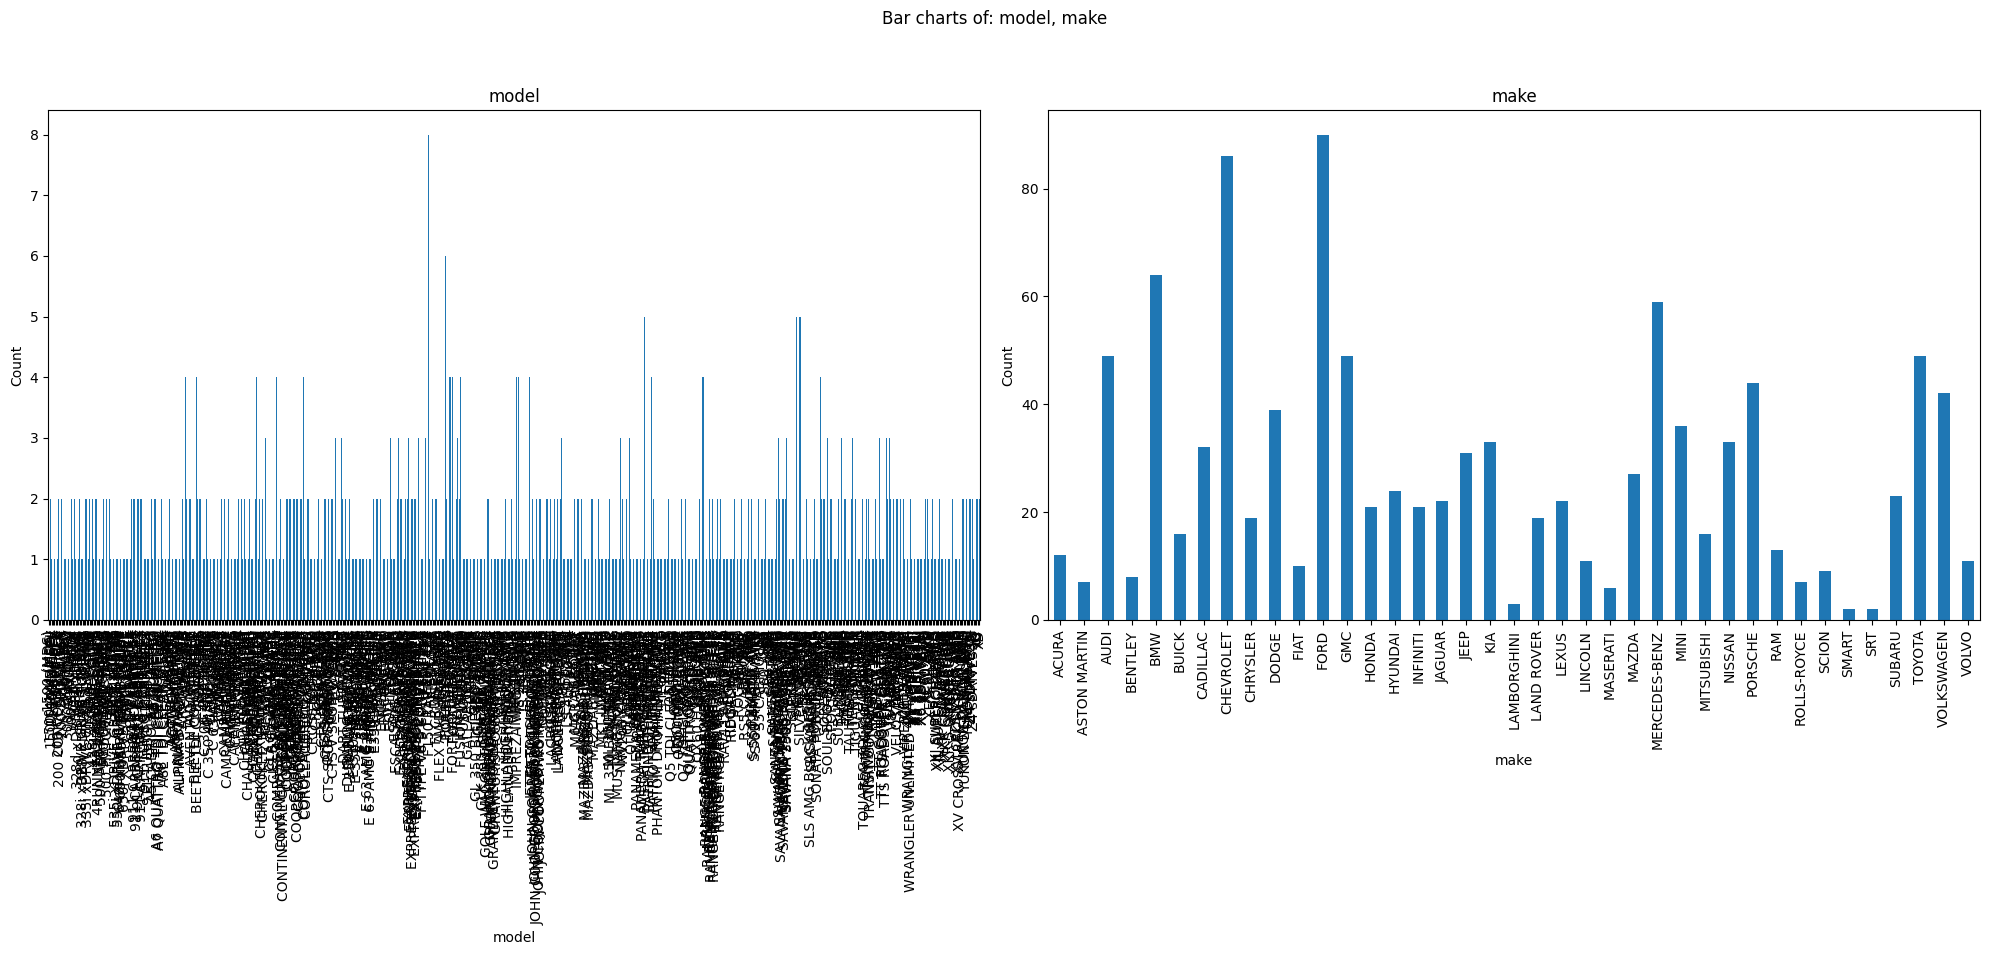

In [24]:
PlotBarCharts(inpData=fuel, colsToPlot=['model', 'make'])

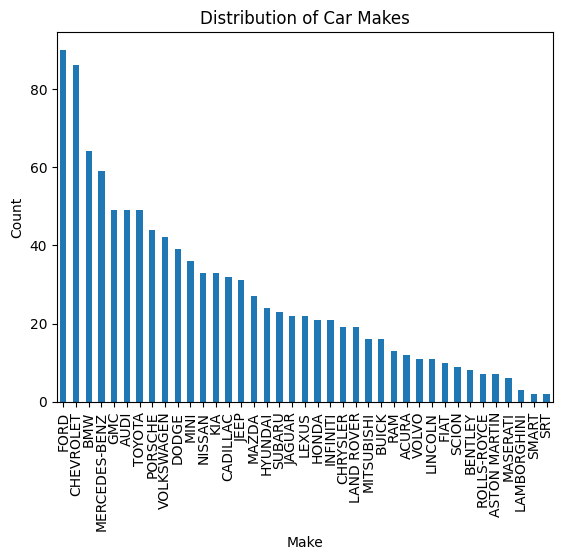

In [31]:

# Count the occurrences of each make
make_counts = fuel['make'].value_counts()

# Plot a bar chart of the makes
figsize=(50, 20)
make_counts.plot.bar()
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Car Makes')
plt.xticks(rotation=90)  # Rotate x labels and adjust font size
plt.show()


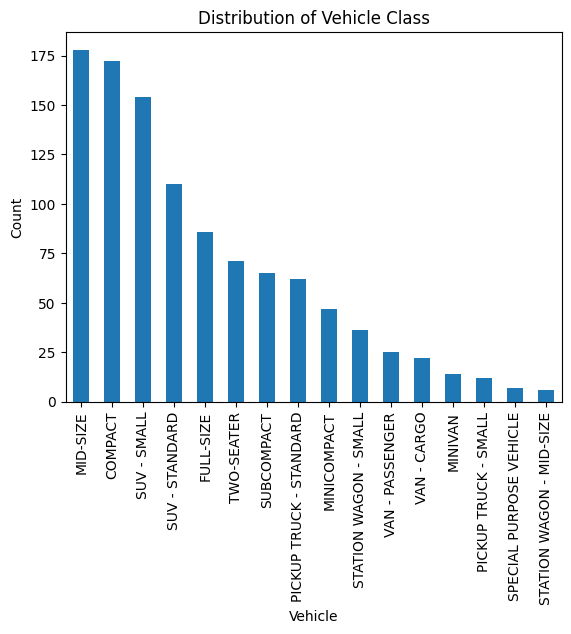

In [32]:
vehicle_counts = fuel['vehicle_class'].value_counts()

vehicle_counts.plot.bar()
plt.xlabel('Vehicle')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.xticks(rotation=90)
plt.show()

### Exploration on the continuous data

In [33]:
### continous data
continous_data = fuel.select_dtypes(exclude='object') 

cd = fuel.select_dtypes(include= ['int64','float64'])


In [36]:
continous_data.head(7)

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
5,2014,3.5,6,11.9,7.7,10.0,28,230
6,2014,3.5,6,11.8,8.1,10.1,28,232


In [37]:
continous_data.columns

Index(['model_year', 'engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [38]:
continous_columns = continous_data.columns

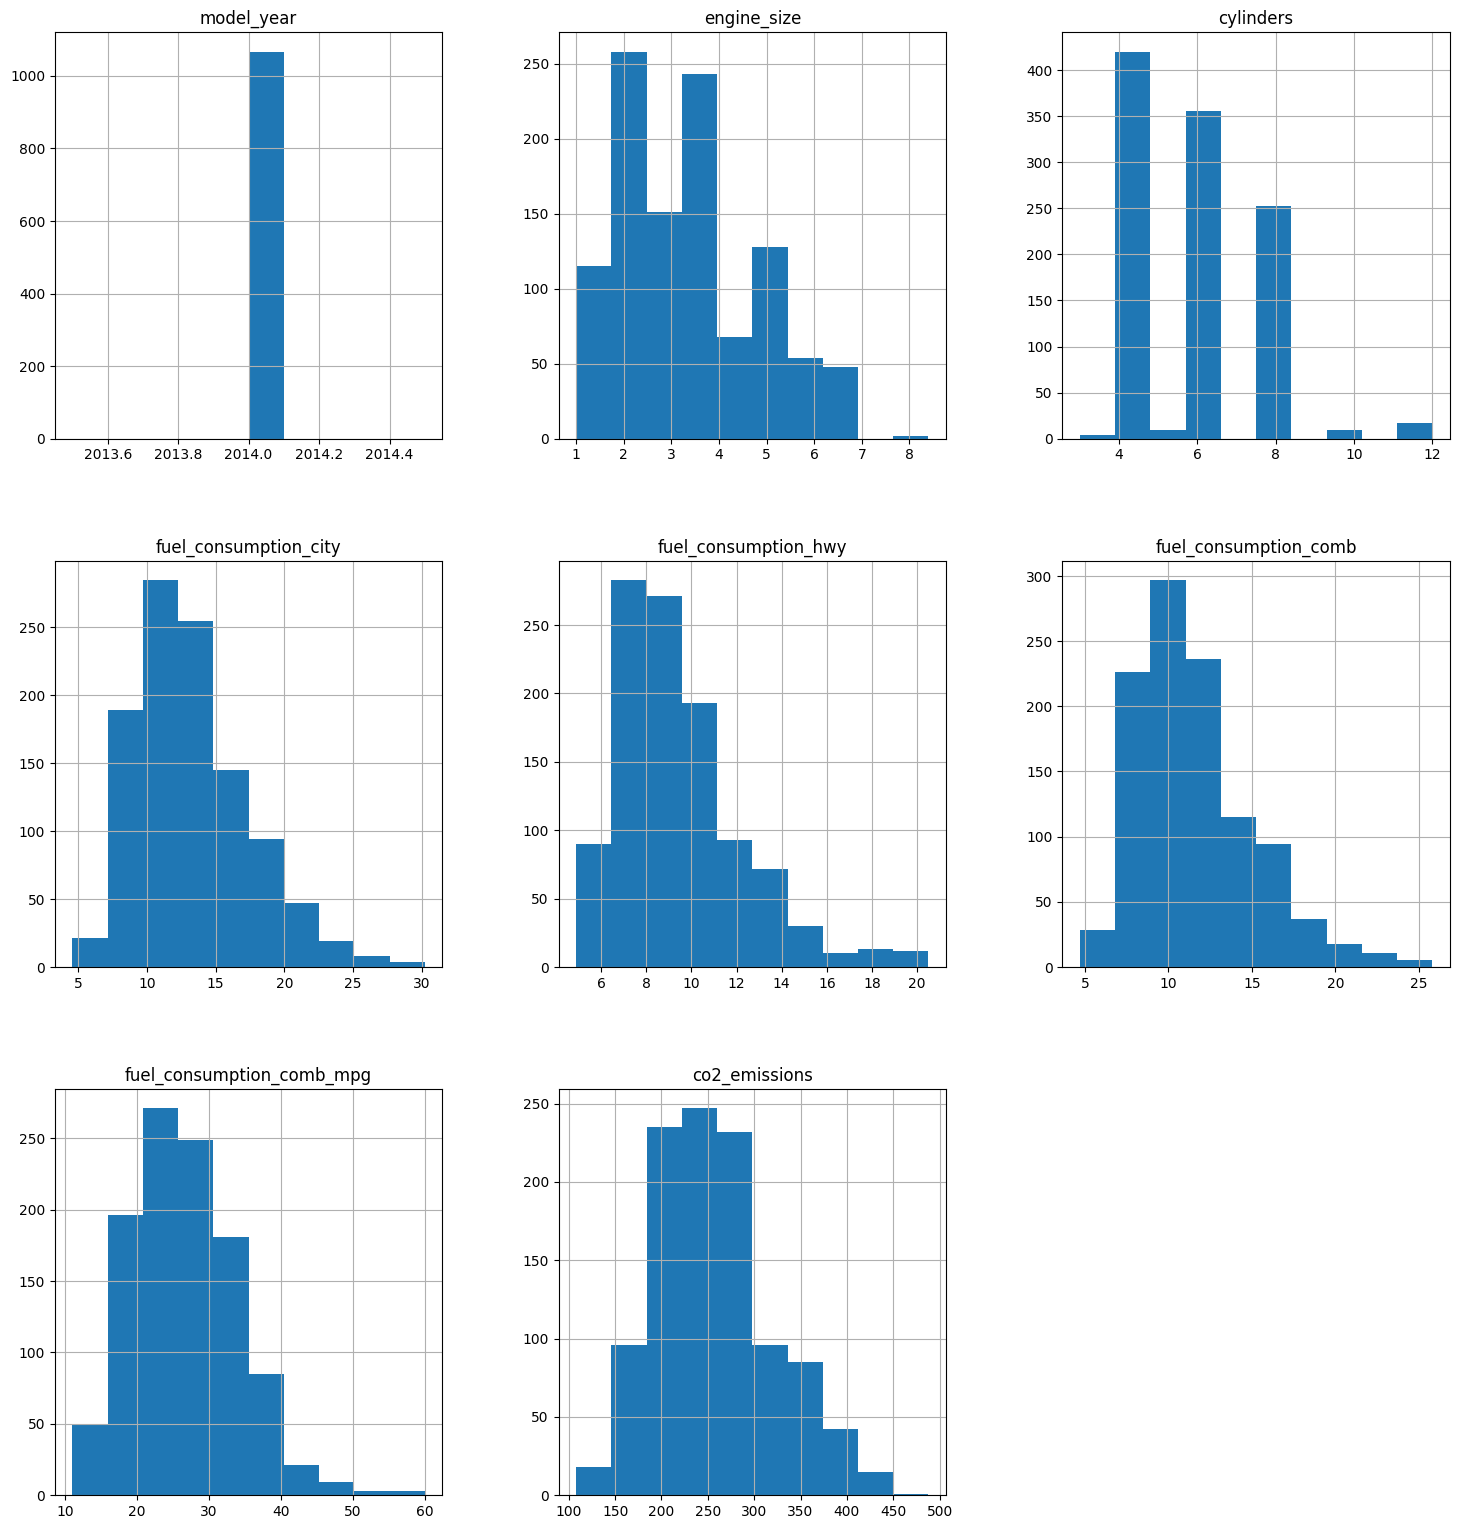

In [39]:
fuel.hist(continous_columns, figsize=(18,19))
plt.show()

Alternatively

In [40]:
numeric_columns = ['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']

### Histograms for the continuous data

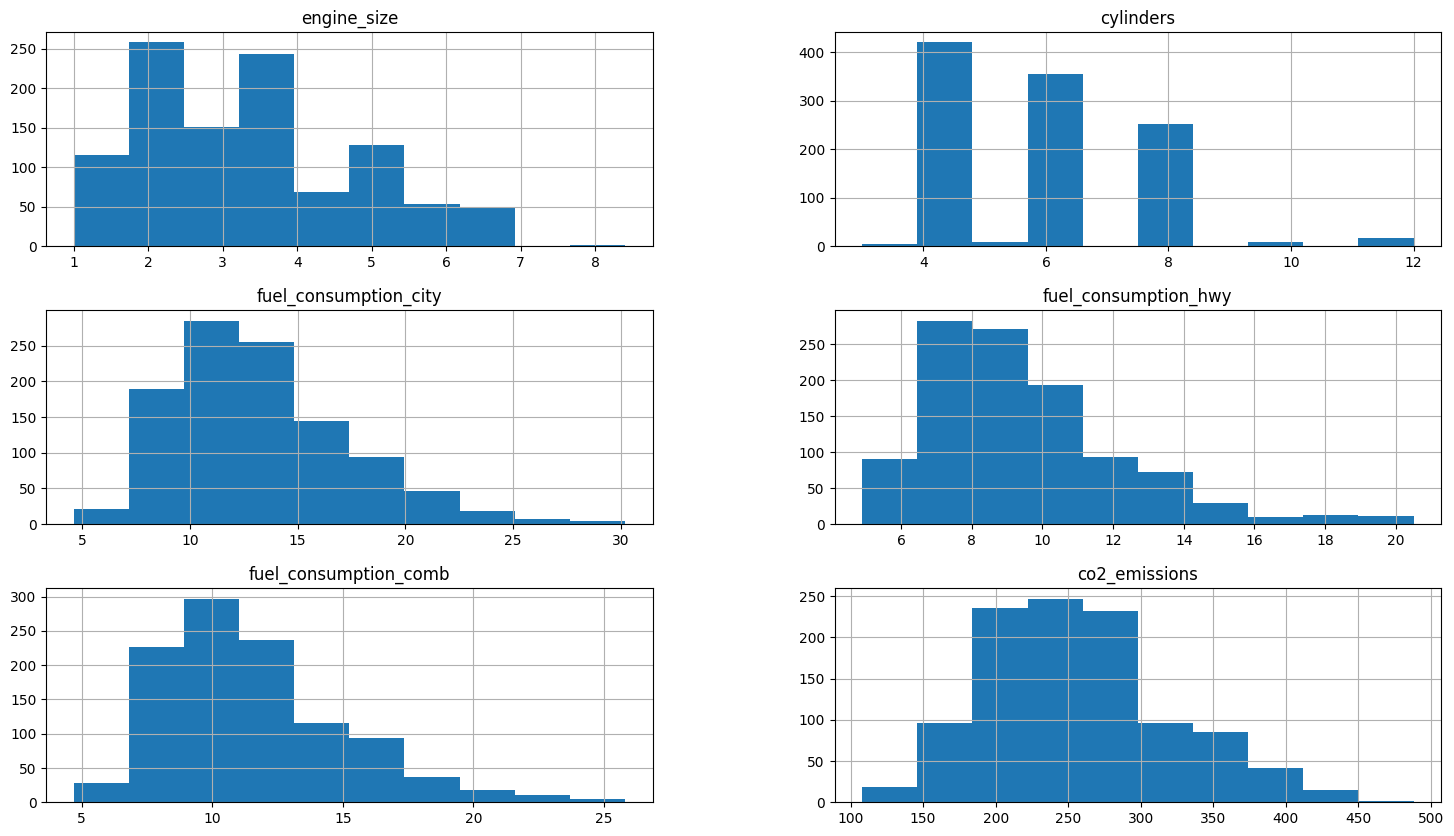

In [41]:
fuel.hist(numeric_columns, figsize=(18,10))
plt.show()

None is normally distributed.

Only cylinders have no outliers.

In [42]:
fuel.head(6)

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230


# Vehicle Class and Make Analysis

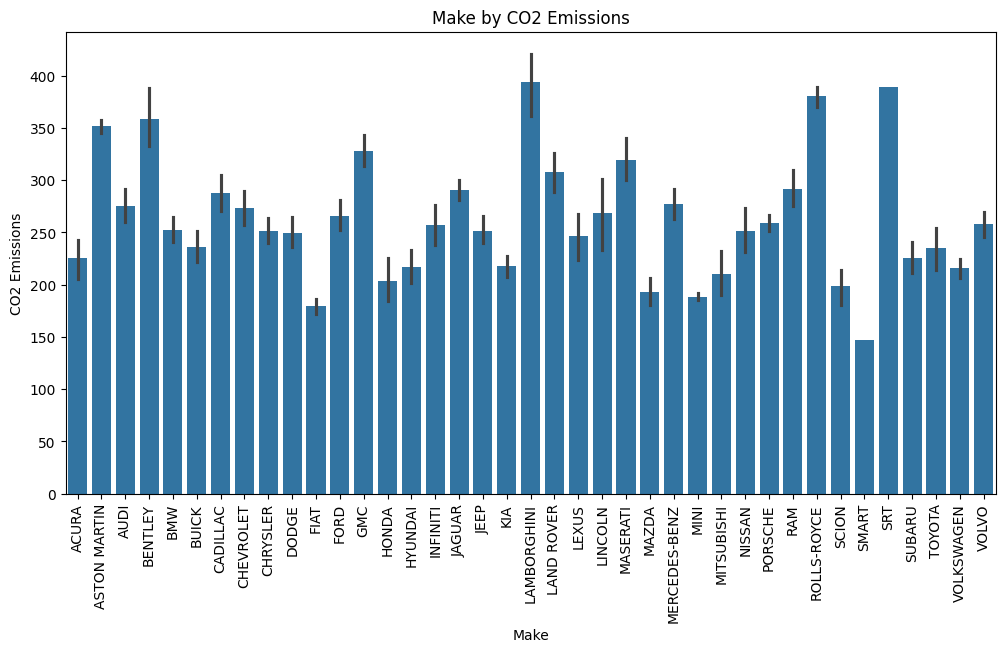

In [45]:
# Geographical Analysis: Plotting a bar chart of emissions by make
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel, x='make', y='co2_emissions')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('CO2 Emissions')
plt.title('Make by CO2 Emissions')
plt.show()

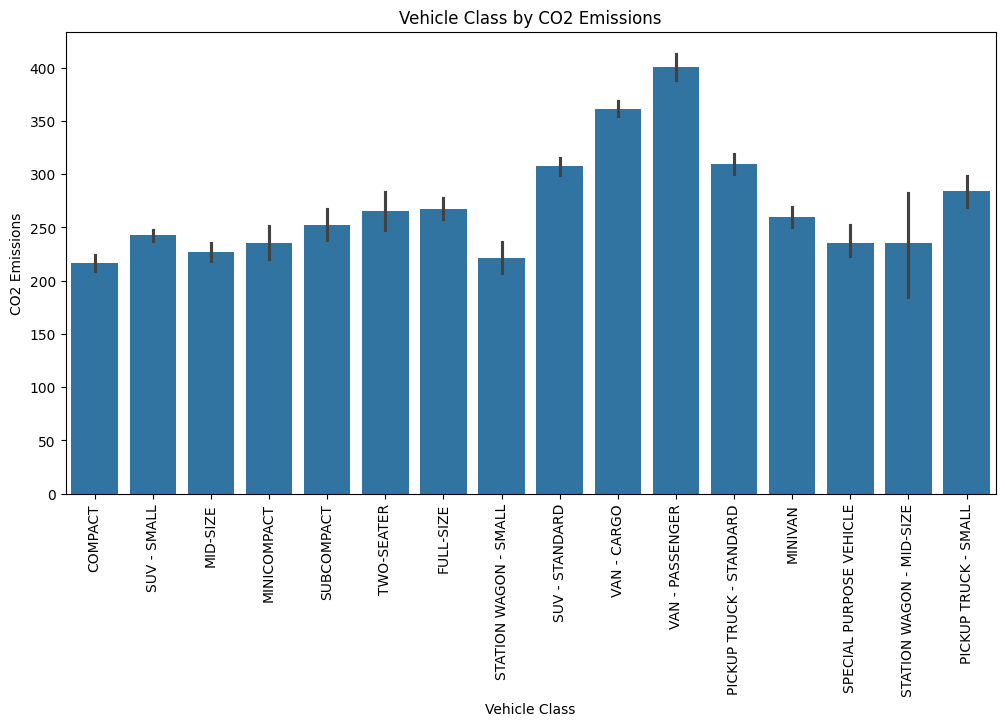

In [46]:
# Geographical Analysis: Plotting a bar chart of emissions by vehicle class
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel, x='vehicle_class', y='co2_emissions')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions')
plt.title('Vehicle Class by CO2 Emissions')
plt.show()

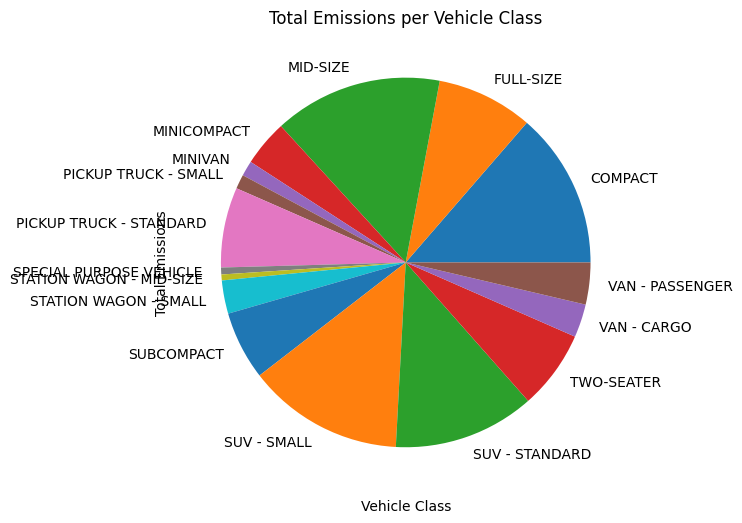

In [47]:
# Calculate total emisisons by vehicle class
total_emissions_per_class = fuel.groupby('vehicle_class')['co2_emissions'].sum()


plt.figure(figsize=(10, 6))
total_emissions_per_class.plot(kind='pie')
plt.xlabel('Vehicle Class')
plt.ylabel('Total Emissions')
plt.title('Total Emissions per Vehicle Class')
plt.xticks(rotation=90)
plt.show()

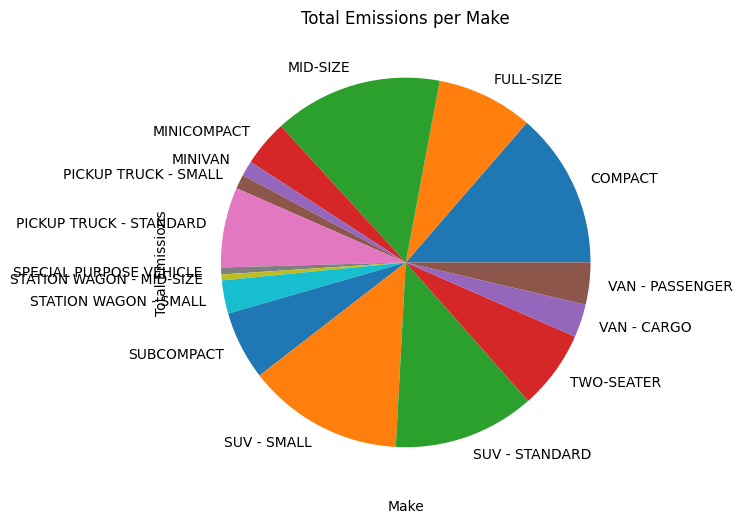

In [48]:
# Calculate total emisisons by make
total_emissions_per_make = fuel.groupby('make')['co2_emissions'].sum()


plt.figure(figsize=(10, 6))
total_emissions_per_class.plot(kind='pie')
plt.xlabel('Make')
plt.ylabel('Total Emissions')
plt.title('Total Emissions per Make')
plt.xticks(rotation=45)
plt.show()

#### Pie chart is not an efficient communication option

## Checking for Outliers

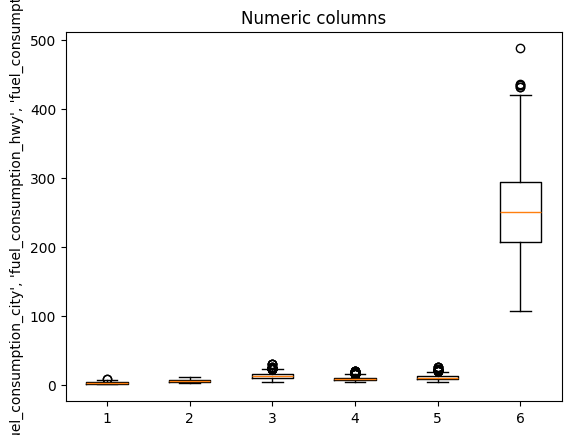

In [49]:
#Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers
#Use either the library seaborn or matplotlib
# Create a box plot for the specified column
plt.boxplot(fuel[numeric_columns])
plt.ylabel(numeric_columns)
plt.title('Numeric columns')
plt.show()

Plot them individually.

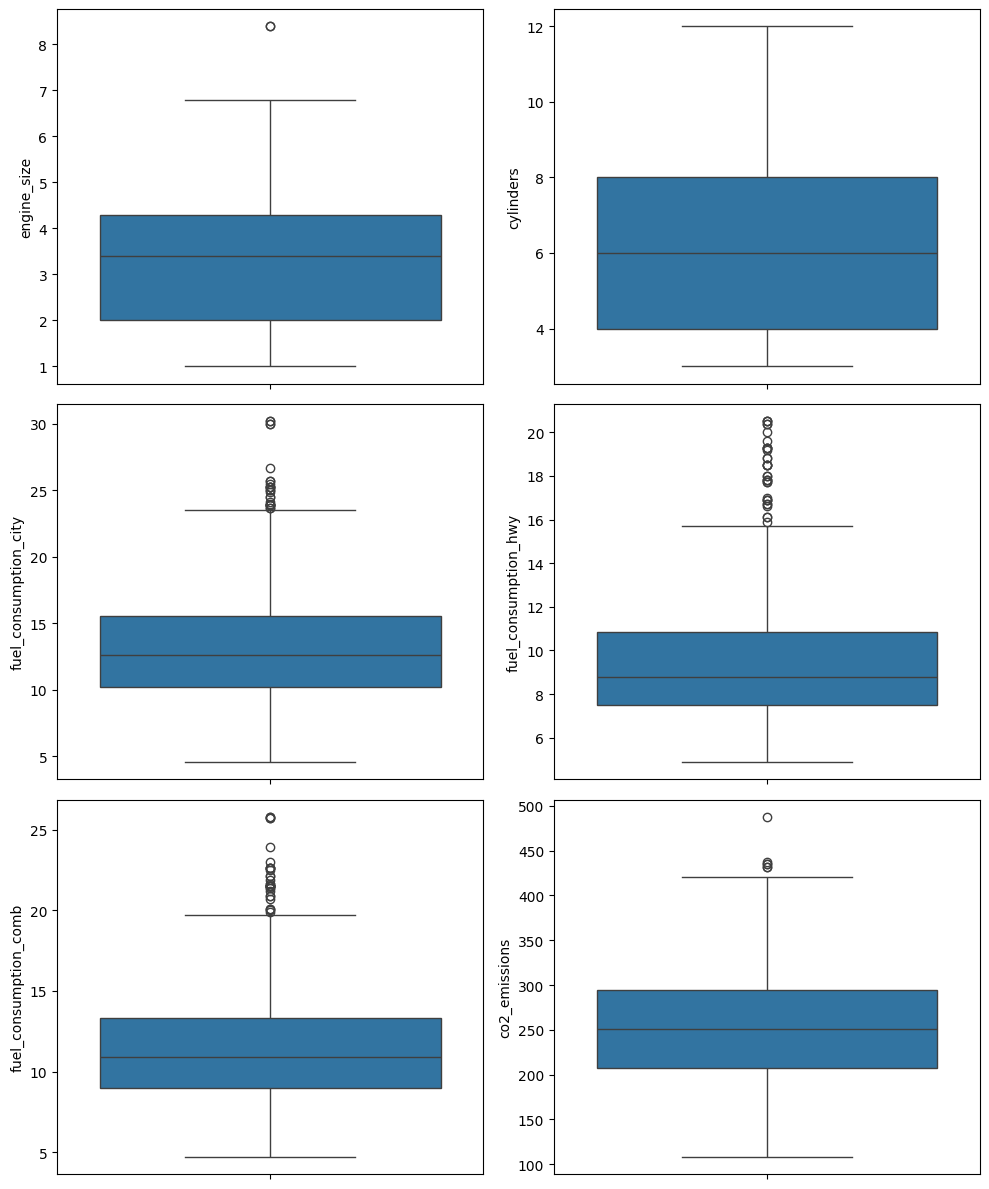

In [50]:

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Define the column names for the boxplots
columns = ["engine_size", "cylinders", "fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb", "co2_emissions"]

# Plot boxplots on subplots using a for loop
for i, col in enumerate(columns):
    row, col_num = divmod(i, 2)
    sns.boxplot(y=col, data=fuel, ax=axes[row, col_num])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Alternatively

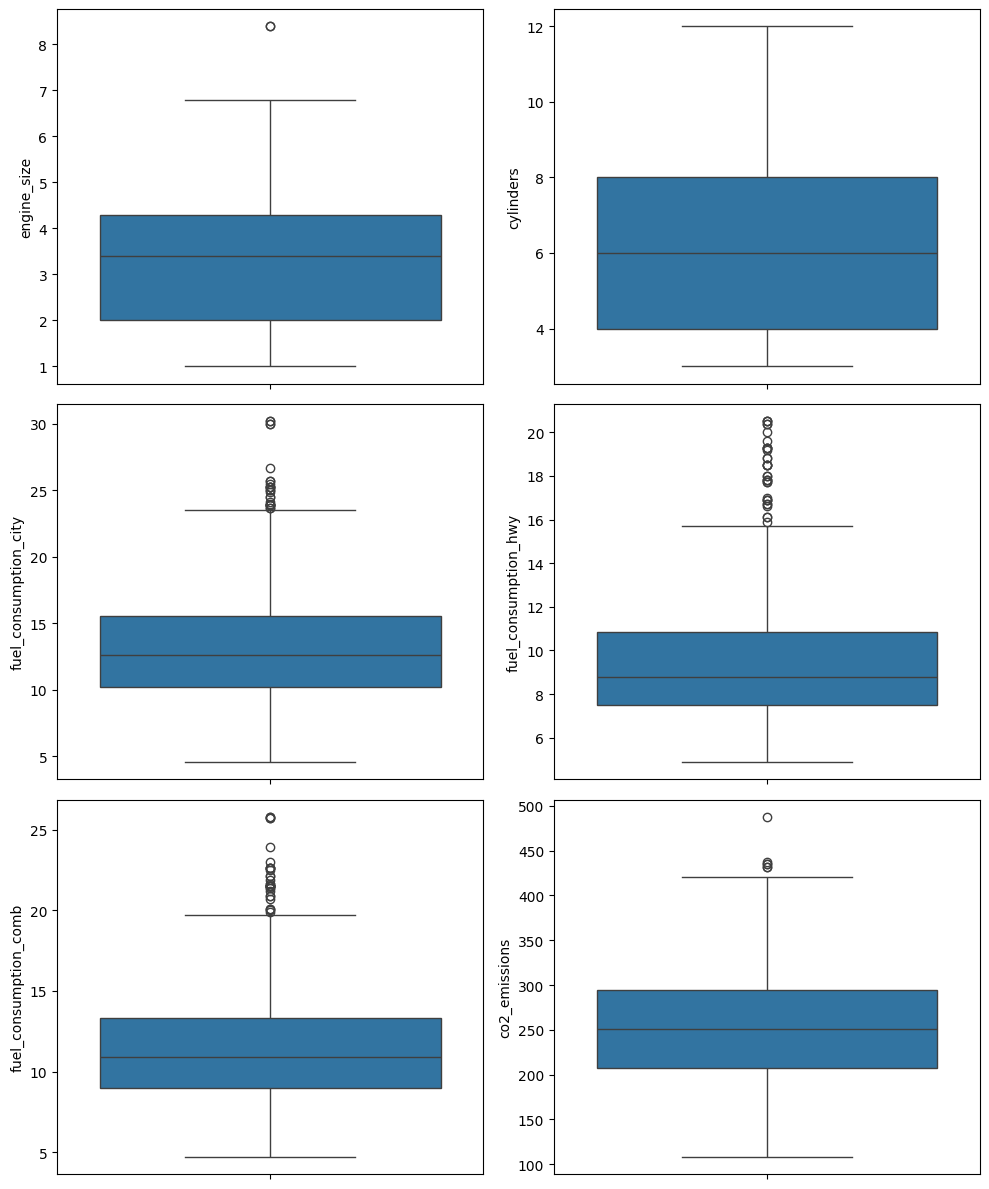

In [51]:

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))


# Plot boxplots on subplots using a for loop
for i, col in enumerate(cdf):
    row, col_num = divmod(i, 2)
    sns.boxplot(y=col, data=fuel, ax=axes[row, col_num])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def boxplots(fuel, cdf, nrows=3, ncols=2, figsize=(10, 12)):
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    
    # Plot boxplots on subplots using a for loop
    for i, col in enumerate(cdf):
        row, col_num = divmod(i, ncols)
        sns.boxplot(y=col, data=data, ax=axes[row, col_num])
        axes[row, col_num].set_title(f'Boxplot of {col}')

    # Remove any unused subplots if there are more subplots than cdf
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes.flatten()[j])
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()
    
    boxplots(fuel,cdf)

